In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
application= pd.read_csv("application_record.csv")
application.columns=map(str.lower,application.columns)
application

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [3]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   438557 non-null  int64  
 1   code_gender          438557 non-null  object 
 2   flag_own_car         438557 non-null  object 
 3   flag_own_realty      438557 non-null  object 
 4   cnt_children         438557 non-null  int64  
 5   amt_income_total     438557 non-null  float64
 6   name_income_type     438557 non-null  object 
 7   name_education_type  438557 non-null  object 
 8   name_family_status   438557 non-null  object 
 9   name_housing_type    438557 non-null  object 
 10  days_birth           438557 non-null  int64  
 11  days_employed        438557 non-null  int64  
 12  flag_mobil           438557 non-null  int64  
 13  flag_work_phone      438557 non-null  int64  
 14  flag_phone           438557 non-null  int64  
 15  flag_email       

In [4]:
credit=pd.read_csv("credit_record.csv")
credit.columns=map(str.lower, credit.columns)
credit

,id,months_balance,status
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [5]:
credit.status.unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   id              1048575 non-null  int64 
 1   months_balance  1048575 non-null  int64 
 2   status          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [7]:
credit.status=credit.status.replace({"X":-2, 'C':-1})
credit.status=credit.status.astype("int")
credit.status=credit.status.apply(lambda x:x+1)
credit.status.unique()

array([-1,  1,  0,  2,  3,  4,  5,  6], dtype=int64)

In [8]:
credit.status.unique()

array([-1,  1,  0,  2,  3,  4,  5,  6], dtype=int64)

In [9]:
credit_month=credit.groupby("id").months_balance.max().reset_index()
credit_month

,id,months_balance
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0
...,...,...
45980,5150482,-11
45981,5150483,0
45982,5150484,0
45983,5150485,0


In [10]:
record=pd.merge(credit_month, credit,how="inner", on=["id", "months_balance"])
record.head()

,id,months_balance,status
0,5001711,0,-1
1,5001712,0,0
2,5001713,0,-1
3,5001714,0,-1
4,5001715,0,-1


In [11]:
df=pd.merge(application, record, on="id", how="inner")
df.head()

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members,months_balance,status
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-22,-1


In [12]:
df = df.rename(columns={'code_gender':'gender',
                   'flag_own_car':'car',
                   'flag_own_realty':'property',
                   'cnt_children':'children',
                   'amt_income_total':'annual_income',
                   'name_income_type':'income_type',
                   'name_education_type':'education',
                   'name_family_status':'family_status',
                   'name_housing_type':'housing_type',
                   'days_birth':'birth_date',
                   'days_employed':'employment',
                   'flag_mobil':'mobile_phone',
                   'flag_work_phone':'work_phone',
                   'flag_phone':'phone',
                   'flag_email': 'email',
                   'cnt_fam_members':'fam_members'
                   })
df.head()

,id,gender,car,property,children,annual_income,income_type,education,family_status,housing_type,birth_date,employment,mobile_phone,work_phone,phone,email,occupation_type,fam_members,months_balance,status
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-22,-1


In [13]:
df.isnull().sum()

id                     0
gender                 0
car                    0
property               0
children               0
annual_income          0
income_type            0
education              0
family_status          0
housing_type           0
birth_date             0
employment             0
mobile_phone           0
work_phone             0
phone                  0
email                  0
occupation_type    11323
fam_members            0
months_balance         0
status                 0
dtype: int64

In [14]:
df["occupation_type"]=df.occupation_type.fillna("others")
#df.isnull().sum()

In [15]:
#def rounding(col):
    #return round(col/-365,0)

#df["age"]=df.birth_date.apply(rounding(df.birth_date))

In [16]:
df["age"]=df.birth_date.apply(lambda x: round(x/-365,0))
#df["year_of_employment"]=df.employment.apply(lambda x: (round(x/-365,0) if x<0 else 0))
df['year_of_employment'] = df.employment.apply(lambda x: round(x/-365,0) if x<0 else 0)
df = df.drop(columns=["birth_date","employment"])

H:\ananconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_income'>

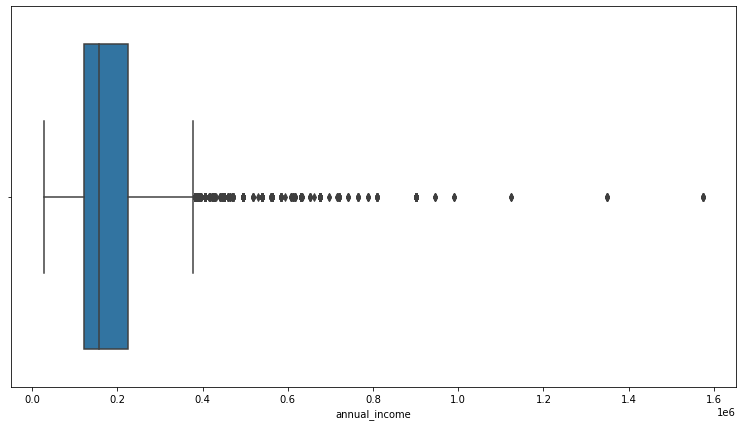

In [17]:
plt.figure(figsize=(13,7))
sns.boxplot(df.annual_income)

H:\ananconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_income'>

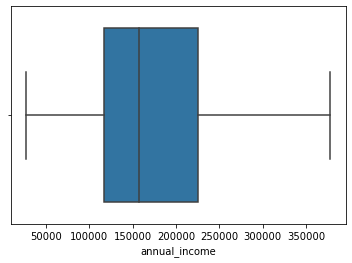

In [18]:
def remove_outlier(col):
    q25=col.quantile(0.25)
    q75=col.quantile(0.75)
    iqr=q75-q25
    cutoff=iqr*1.5
    lower=q25-cutoff
    upper=q75+cutoff
    
    return lower, upper
lower, upper = remove_outlier(df.annual_income)

df = df.loc[(df.annual_income > lower) & (df.annual_income < upper)]

sns.boxplot(df.annual_income)

H:\ananconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fam_members'>

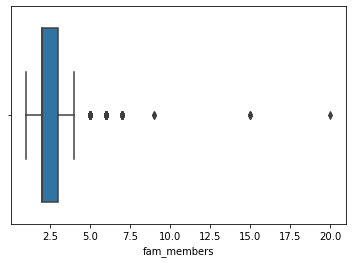

In [19]:
sns.boxplot(df.fam_members)

H:\ananconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2.0    18729
1.0     6721
3.0     6057
4.0     2976
Name: fam_members, dtype: int64

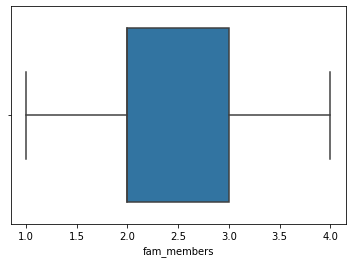

In [20]:
remove_outlier(df.fam_members)

df = df.loc[(df.fam_members>0.5) & (df.fam_members <4.5)]

sns.boxplot(df.fam_members)

df.fam_members.value_counts()

In [21]:
df["target"]=None
df.loc[df.status<1, "target"]=0
df.loc[df.status>=1, "target"]=1
df.target=pd.to_numeric(df.target)
df.head()

,id,gender,car,property,children,annual_income,income_type,education,family_status,housing_type,...,work_phone,phone,email,occupation_type,fam_members,months_balance,status,age,year_of_employment,target
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Security staff,2.0,0,0,59.0,3.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,0,1,52.0,8.0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,-22,-1,52.0,8.0,0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,0,0,52.0,8.0,0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,0,0,52.0,8.0,0


In [22]:
df.drop(columns=['months_balance', 'status', 'mobile_phone'],inplace=True)

In [23]:
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=df[i].astype("category")
        
df.dtypes

id                       int64
gender                category
car                   category
property              category
children                 int64
annual_income          float64
income_type           category
education             category
family_status         category
housing_type          category
work_phone               int64
phone                    int64
email                    int64
occupation_type       category
fam_members            float64
age                    float64
year_of_employment     float64
target                   int64
dtype: object

**Feature Engineering**

In [24]:
#category encoding
#2.1 Encoding without using target variable

In [25]:
df_a=df#encoding without the target


In [26]:
df_b=df#encoding with the target

In [27]:
# to avoid data leakage: divide into train test 

x_a= df_a.iloc[:, 1:-1]
y_a=df_a.iloc[:, -1]

from sklearn.model_selection import train_test_split

x_a_train, x_a_test, y_a_train,y_a_test= train_test_split(x_a, y_a, test_size=0.3)

In [28]:
# binary/ordinal variables
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

le=LabelEncoder()

#apply to the x_train and X_test

x_a_train.loc[:, "gender"]=le.fit_transform(x_a_train.loc[:,"gender"])
x_a_train.loc[:, "car"]=le.fit_transform(x_a_train.loc[:,"car"])
x_a_train.loc[:, "property"]=le.fit_transform(x_a_train.loc[:,"property"])

x_a_test.loc[:, "gender"]=le.fit_transform(x_a_test.loc[:,"gender"])
x_a_test.loc[:, "car"]=le.fit_transform(x_a_test.loc[:,"car"])
x_a_test.loc[:, "property"]=le.fit_transform(x_a_test.loc[:,"property"])

In [29]:
#Nominal variables
#dummy encoding, OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

oneHot=OneHotEncoder(sparse=False, drop="first", handle_unknown="error")

nominal=oneHot.fit_transform(x_a_train[["income_type", "education", "family_status", "housing_type", 
                                        "occupation_type"]])

df_nominal=pd.DataFrame(index=x_a_train.index, data=nominal, columns=oneHot.get_feature_names(['income_type', 'education', 
                                                                                               'family_status',
                                                                        'housing_type', 'occupation_type']))
x_a_train=pd.concat([x_a_train, df_nominal], axis=1)
x_a_train.drop(columns=['income_type', 'education', 'family_status','housing_type', 'occupation_type'], inplace=True)
x_a_train.shape

H:\ananconda1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(24138, 46)

In [30]:
nominal_test=oneHot.fit_transform(x_a_test[["income_type", "education", "family_status", "housing_type", 
                                        "occupation_type"]])

df_nominal_test=pd.DataFrame(index=x_a_test.index, data=nominal_test, columns=oneHot.get_feature_names(['income_type', 'education', 
                                                                                               'family_status',
                                                                        'housing_type', 'occupation_type']))
x_a_test=pd.concat([x_a_test, df_nominal_test], axis=1)
x_a_test.drop(columns=['income_type', 'education', 'family_status','housing_type', 'occupation_type'], inplace=True)
x_a_test.shape

H:\ananconda1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(10345, 46)

(array([12786.,  5349.,  2804.,  1630.,   644.,   414.,   305.,   115.,
           53.,    38.]),
 array([ 0. ,  4.3,  8.6, 12.9, 17.2, 21.5, 25.8, 30.1, 34.4, 38.7, 43. ]),
 <BarContainer object of 10 artists>)

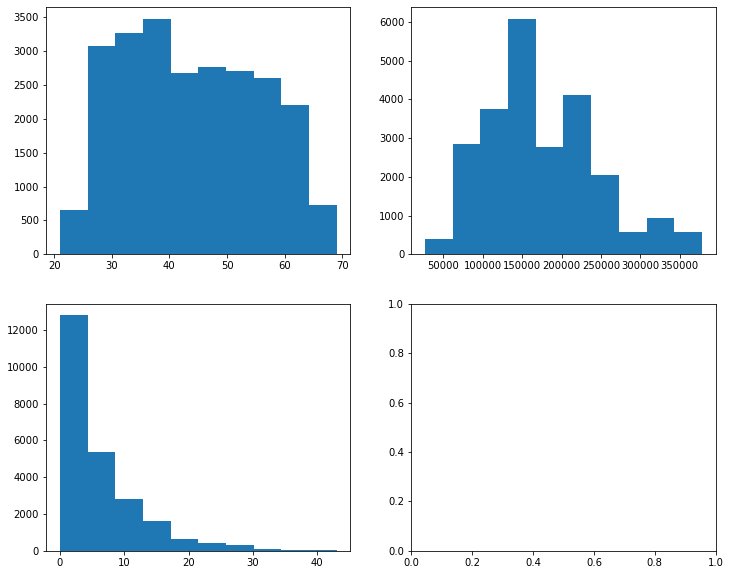

In [31]:
#continous variables
fig, ax=plt.subplots(2,2, figsize=(12,10))

ax[0][0].hist(x_a_train.age)
ax[0][1].hist(x_a_train.annual_income)
ax[1][0].hist(x_a_train.year_of_employment)

In [32]:
#Option: Fixed-width binning (rounding) or Adaptive binning (quantiles)
#Here, we apply adaptive binning since fixed-width binning requires pre-defining the bins (which is subjective)

#apply to X_test

x_a_train["age_binned"]=pd.qcut(x_a_train.age, q=[0,.25,.50,.75,1])
x_a_train["annual_income_binned"]=pd.qcut(x_a_train.annual_income, q=[0,.25,.50,.75,1])
x_a_train["year_of_employment_binned"]=pd.qcut(x_a_train.year_of_employment, q=[0,.25,.50,.75,1])

x_a_train.drop(columns=['age', 'annual_income', 'year_of_employment'], inplace=True)

#since each category is divided into 5 equal bins we can apply LabelEncoder

x_a_train['age']=le.fit_transform(x_a_train['age_binned'])
x_a_train['annual_income']=le.fit_transform(x_a_train["annual_income_binned"])
x_a_train['year_of_employment']=le.fit_transform(x_a_train["year_of_employment_binned"])

x_a_train.drop(columns=['age_binned','annual_income_binned', 'year_of_employment_binned'],inplace=True)
x_a_train.head()

,gender,car,property,children,work_phone,phone,email,fam_members,income_type_Pensioner,income_type_State servant,...,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,occupation_type_others,age,annual_income,year_of_employment
16787,0,1,1,2,0,0,0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,3
1383,0,1,0,2,0,0,0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,2
28477,0,0,1,0,0,0,0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,3
13698,1,1,0,1,0,0,0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,3,2
33454,0,0,1,0,0,1,0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,3,0


In [33]:
#apply to X_test


x_a_test["age_binned"]=pd.qcut(x_a_test.age, q=[0,.25,.50,.75,1])
x_a_test["annual_income_binned"]=pd.qcut(x_a_test.annual_income, q=[0,.25,.50,.75,1])
x_a_test["year_of_employment_binned"]=pd.qcut(x_a_test.year_of_employment, q=[0,.25,.50,.75,1])

x_a_test.drop(columns=['age', 'annual_income', 'year_of_employment'], inplace=True)

#since each category is divided into 5 equal bins we can apply LabelEncoder

x_a_test['age']=le.fit_transform(x_a_test['age_binned'])
x_a_test['annual_income']=le.fit_transform(x_a_test["annual_income_binned"])
x_a_test['year_of_employment']=le.fit_transform(x_a_test["year_of_employment_binned"])

x_a_test.drop(columns=['age_binned','annual_income_binned', 'year_of_employment_binned'],inplace=True)
x_a_test.head()

,gender,car,property,children,work_phone,phone,email,fam_members,income_type_Pensioner,income_type_State servant,...,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,occupation_type_others,age,annual_income,year_of_employment
31842,0,1,1,1,0,0,0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,1,0
8318,0,1,1,1,0,0,0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,2
29200,0,0,1,2,0,0,0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,2
26656,1,1,1,1,0,0,0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
13687,1,1,0,2,1,0,0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2,2


In [34]:
#2.2 Encoding with target

#Pre-requisite: train test split to avoid data leakage

x_b = df_b.iloc[:, 1:-1]
y_b = df_b.iloc[:, -1]

from sklearn.model_selection import train_test_split

x_b_train, x_b_test, y_b_train, y_b_test = train_test_split(x_b, y_b, test_size=0.3, random_state=1)

In [35]:
#using installed category_encoders
#option 1: using WOE-weight of evidence encoder

#Option 1: WOE Encoder
import category_encoders as ce

woe = ce.WOEEncoder()

def woe_encoder(col, target):
    for i in range(len(x_b_train.columns)):
        col.iloc[:,i] = woe.fit_transform(col, target)
    return col

df_woe_train = woe_encoder(x_b_train, y_b_train)
df_woe_train.head()

,gender,car,property,children,annual_income,income_type,education,family_status,housing_type,work_phone,phone,email,occupation_type,fam_members,age,year_of_employment
25003,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375
34848,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375
13418,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375
13885,-0.011444,-0.011444,-0.011444,-0.011444,-0.011444,-0.011444,-0.011444,-0.011444,-0.011444,-0.011444,-0.011444,-0.011444,-0.011444,-0.011444,-0.011444,-0.011444
26023,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375


In [36]:
df_woe_test=woe_encoder(x_b_test, y_b_test)
df_woe_test.head()

,gender,car,property,children,annual_income,income_type,education,family_status,housing_type,work_phone,phone,email,occupation_type,fam_members,age,year_of_employment
7293,-0.011049,-0.011049,-0.011049,-0.011049,-0.011049,-0.011049,-0.011049,-0.011049,-0.011049,-0.011049,-0.011049,-0.011049,-0.011049,-0.011049,-0.011049,-0.011049
25145,0.022907,0.022907,0.022907,0.022907,0.022907,0.022907,0.022907,0.022907,0.022907,0.022907,0.022907,0.022907,0.022907,0.022907,0.022907,0.022907
18640,0.022907,0.022907,0.022907,0.022907,0.022907,0.022907,0.022907,0.022907,0.022907,0.022907,0.022907,0.022907,0.022907,0.022907,0.022907,0.022907
23707,-0.011049,-0.011049,-0.011049,-0.011049,-0.011049,-0.011049,-0.011049,-0.011049,-0.011049,-0.011049,-0.011049,-0.011049,-0.011049,-0.011049,-0.011049,-0.011049
2403,-0.011049,-0.011049,-0.011049,-0.011049,-0.011049,-0.011049,-0.011049,-0.011049,-0.011049,-0.011049,-0.011049,-0.011049,-0.011049,-0.011049,-0.011049,-0.011049


In [37]:
#option 2: Target Encoder
#Option 2: Target Encoder

y_b_train = pd.to_numeric(y_b_train)
y_b_test = pd.to_numeric(y_b_test)

from category_encoders import TargetEncoder

te = TargetEncoder()

def target_encoder(col, target):
    for i in range(len(x_b_train.columns)):
        col.iloc[:,i] = te.fit_transform(col, target)
    return col

df_te_train = target_encoder(x_b_train, y_b_train)
df_te_train.head()

,gender,car,property,children,annual_income,income_type,education,family_status,housing_type,work_phone,phone,email,occupation_type,fam_members,age,year_of_employment
25003,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375
34848,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375
13418,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375
13885,-0.011444,-0.011444,-0.011444,-0.011444,-0.011444,-0.011444,-0.011444,-0.011444,-0.011444,-0.011444,-0.011444,-0.011444,-0.011444,-0.011444,-0.011444,-0.011444
26023,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375,0.005375


In [38]:
#3. feature scaling(Data normalizatoin and standarization)

#3.1 df_a (encoded without target)

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

x_a_train_ss=pd. DataFrame(StandardScaler().fit_transform(x_a_train), columns=x_a_train.columns)

x_a_train_ss.head()

,gender,car,property,children,work_phone,phone,email,fam_members,income_type_Pensioner,income_type_State servant,...,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,occupation_type_others,age,annual_income,year_of_employment
0,-0.687617,1.313156,0.704143,2.481639,-0.539005,-0.640515,-0.308932,2.222350,-0.461811,-0.288105,...,-0.099153,-0.046014,-0.328649,-0.063520,-0.12748,-0.06949,-0.678876,-1.302744,-1.326631,1.366129
1,-0.687617,1.313156,-1.420167,2.481639,-0.539005,-0.640515,-0.308932,2.222350,-0.461811,-0.288105,...,-0.099153,-0.046014,-0.328649,-0.063520,-0.12748,-0.06949,-0.678876,-0.416477,-0.374948,0.496817
2,-0.687617,-0.761524,0.704143,-0.595535,-0.539005,-0.640515,-0.308932,-0.180691,-0.461811,-0.288105,...,-0.099153,-0.046014,-0.328649,-0.063520,-0.12748,-0.06949,-0.678876,1.356057,1.528417,1.366129
3,1.454298,1.313156,-1.420167,0.943052,-0.539005,-0.640515,-0.308932,1.020830,-0.461811,3.470961,...,-0.099153,-0.046014,-0.328649,-0.063520,-0.12748,-0.06949,1.473023,-0.416477,1.528417,0.496817
4,-0.687617,-0.761524,0.704143,-0.595535,-0.539005,1.561244,-0.308932,-0.180691,-0.461811,-0.288105,...,-0.099153,-0.046014,-0.328649,15.743105,-0.12748,-0.06949,-0.678876,0.469790,1.528417,-1.241808


In [39]:
#Robust scaler shrinks data into medians and quatiles, thus not affected by outliers
#standard scaler shrinks data to a mean=0 and std=1 with prescence of outliers affecting the balanced scale
#MinMax scaler compresses data to a range of [0,1] which is limited to modelling

rs=RobustScaler()
x_a_train_rs=pd.DataFrame(rs.fit_transform(x_a_train), columns=x_a_train.columns)
x_a_train_rs.head()

,gender,car,property,children,work_phone,phone,email,fam_members,income_type_Pensioner,income_type_State servant,...,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,occupation_type_others,age,annual_income,year_of_employment
0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,-0.5,1.0
1,0.0,1.0,-1.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,1.0,1.0,-1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.5
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.5,1.0,-0.5


In [41]:
x_a_test_rs=pd.DataFrame(rs.fit_transform(x_a_test), columns=x_a_test.columns)

In [40]:
x_a_train_mm=pd.DataFrame(MinMaxScaler().fit_transform(x_a_train), columns=x_a_train.columns)
x_a_train_mm.head()

,gender,car,property,children,work_phone,phone,email,fam_members,income_type_Pensioner,income_type_State servant,...,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,occupation_type_others,age,annual_income,year_of_employment
0,0.0,1.0,1.0,0.666667,0.0,0.0,0.0,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000
1,0.0,1.0,0.0,0.666667,0.0,0.0,0.0,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333,0.666667
2,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000
3,1.0,1.0,0.0,0.333333,0.0,0.0,0.0,0.666667,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.333333,1.000000,0.666667
4,0.0,0.0,1.0,0.000000,0.0,1.0,0.0,0.333333,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.666667,1.000000,0.000000


In [42]:
#3.2 applyin scaling to the df_b (encoded with targets)

x_b_train_rs=pd.DataFrame(RobustScaler().fit_transform(x_b_train), columns=x_b_train.columns)
x_b_test_rs=pd.DataFrame(RobustScaler().fit_transform(x_b_test), columns=x_b_test.columns)

In [44]:
#4 Dealing with imbalanced data  (Random Undersampling / oversampling (SMOTE))

a_target_0= df_a[df_a.target==0].target.count()/ df_a.target.count()
a_target_1= df_a[df_a.target==1].target.count()/df_a.target.count()

print(a_target_0)
print(a_target_1)

0.7577936954441319
0.2422063045558681


In [53]:
from imblearn.over_sampling import SMOTE
from collections import Counter

oversample=SMOTE()

x_a_train_rs_over, y_a_train_over= oversample.fit_resample(x_a_train_rs, y_a_train)
print(Counter(y_a_train_over))
#y_a_train_over.value_counts()

Counter({0: 18296, 1: 18296})


In [55]:
from imblearn.over_sampling import SMOTE #doctest: +Normalize_whitespace

oversample=SMOTE(random_state=42)
x_a_train_rs_over, y_a_train_over= oversample.fit_resample(x_a_train_rs, y_a_train)
print(Counter(y_a_train_over))


Counter({0: 18296, 1: 18296})


In [56]:
#4.2 Random Undersampling 

from imblearn.under_sampling import RandomUnderSampler

undersample=RandomUnderSampler()

x_a_train_rs_under, y_a_train_under= undersample.fit_resample(x_a_train_rs, y_a_train)
print(Counter(y_a_train_under))


Counter({0: 5842, 1: 5842})


In [57]:
#Random Undersampling generally selects data from the majority class/category to delete from the dataset
#which might result into information loss during modelling

#SMOTE (Oversampling) duplicatees data from the minority class/ category which helps balance the distribution
#but does not provide any additional information to the model

#apply to x_test_set
x_a_test_rs_over, y_a_test_over=oversample.fit_resample(x_a_test_rs, y_a_test)

#apply to x_b set

x_b_train_rs_over, y_b_train_over=oversample.fit_resample(x_b_train_rs, y_b_train)
print(Counter(y_b_train_over))

x_b_test_rs_over, y_b_test_over = oversample.fit_resample(x_b_test_rs, y_b_test)
print(Counter(y_b_test_over))



Counter({1: 18324, 0: 18324})
Counter({0: 7807, 1: 7807})


**5. Feature Selection//Dimensionality reduction**

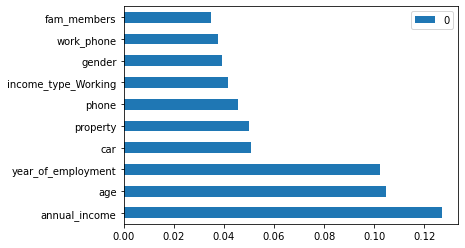

In [61]:
#5.1 Feature Importance 

#5.1.1 Test on df_a set first

from sklearn.ensemble import ExtraTreesClassifier

fi=ExtraTreesClassifier()
fi_a=fi.fit(x_a_train_rs_over, y_a_train_over)

df_fi_a=pd.DataFrame(fi_a.feature_importances_,index=x_a_train_rs_over.columns)
df_fi_a.nlargest(10, df_fi_a.columns).plot(kind="barh")
plt.show()


occupation_type_Realty agents              0.008781
housing_type_House / apartment             0.008894
family_status_Widow                        0.009055
income_type_Working                        0.011451
family_status_Married                      0.015665
age                                        0.015680
occupation_type_Cleaning staff             0.019805
property                                   0.024624
education_Secondary / secondary special    0.033795
target                                     1.000000
Name: target, dtype: float64


<AxesSubplot:>

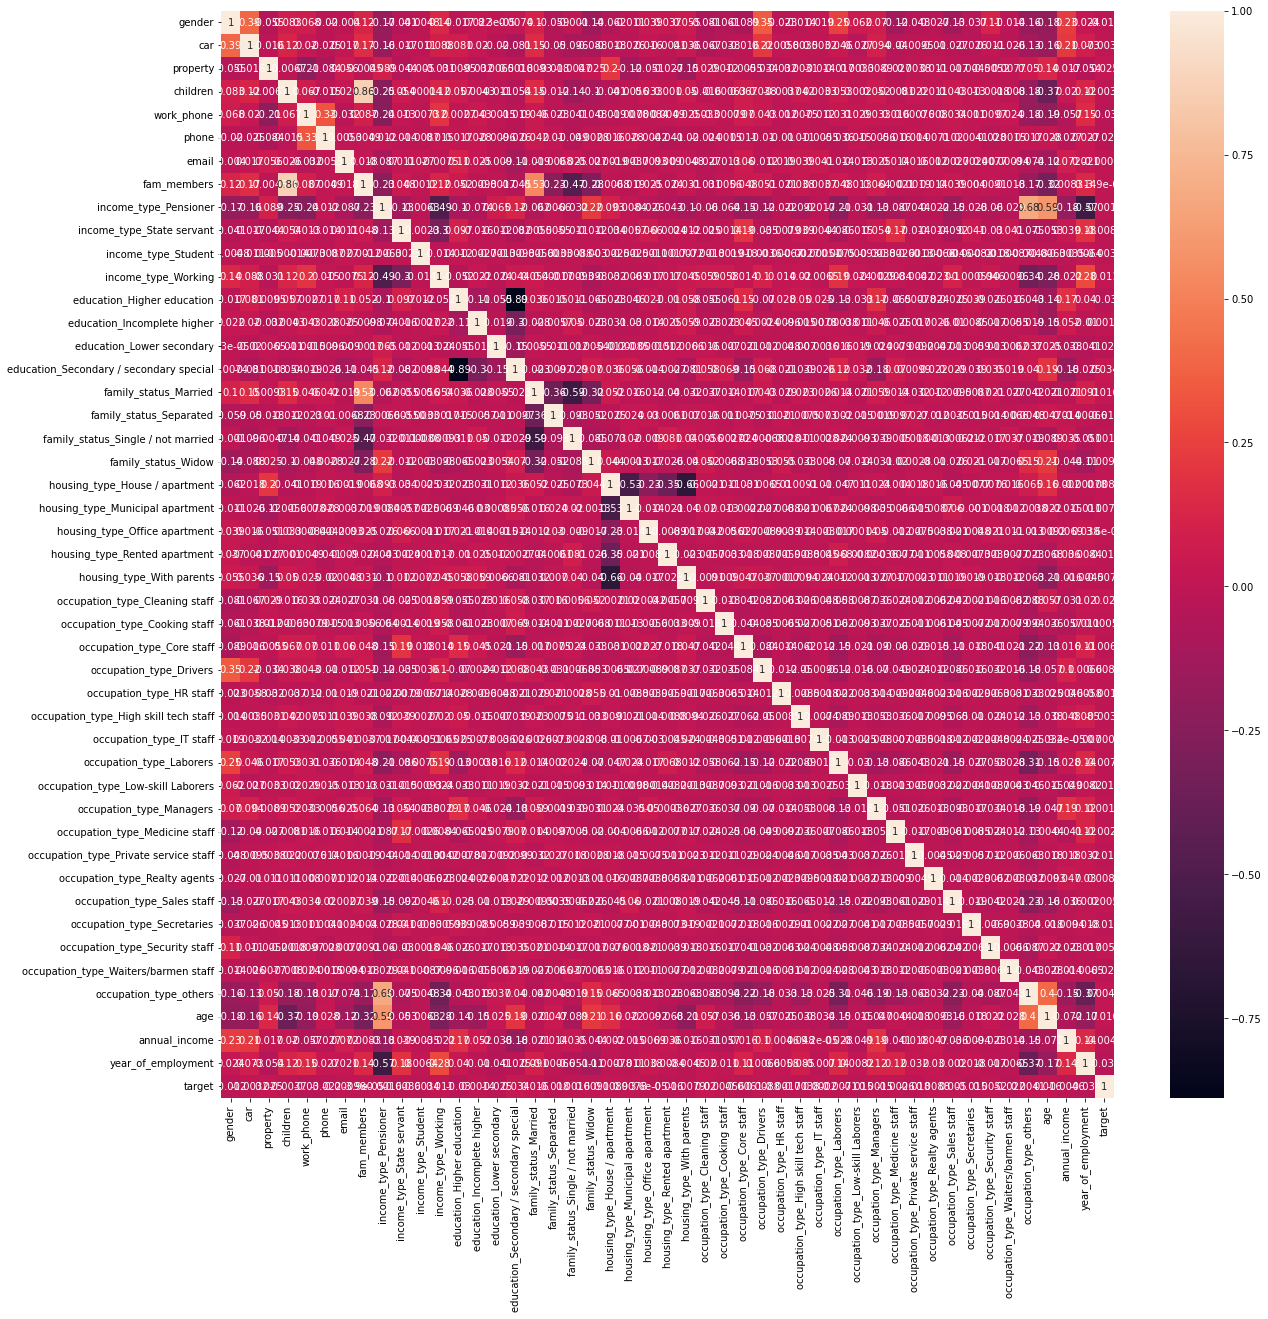

In [63]:
#5.2 Correlational matrix

#5.1.2 Test on df_a set 

df_a_train_processed= pd.concat([x_a_train_rs_over, y_a_train_over], axis=1)
cm_a=df_a_train_processed.corr()

print(cm_a.target.sort_values().tail(10))

plt.figure(figsize=(20,20))
sns.heatmap(cm_a, xticklabels=df_a_train_processed.columns, yticklabels=df_a_train_processed.columns, annot=True)



year_of_employment    0.002281
housing_type          0.002281
education             0.002281
income_type           0.002281
annual_income         0.002281
children              0.002281
property              0.002281
car                   0.002281
family_status         0.002281
target                1.000000
Name: target, dtype: float64


<AxesSubplot:>

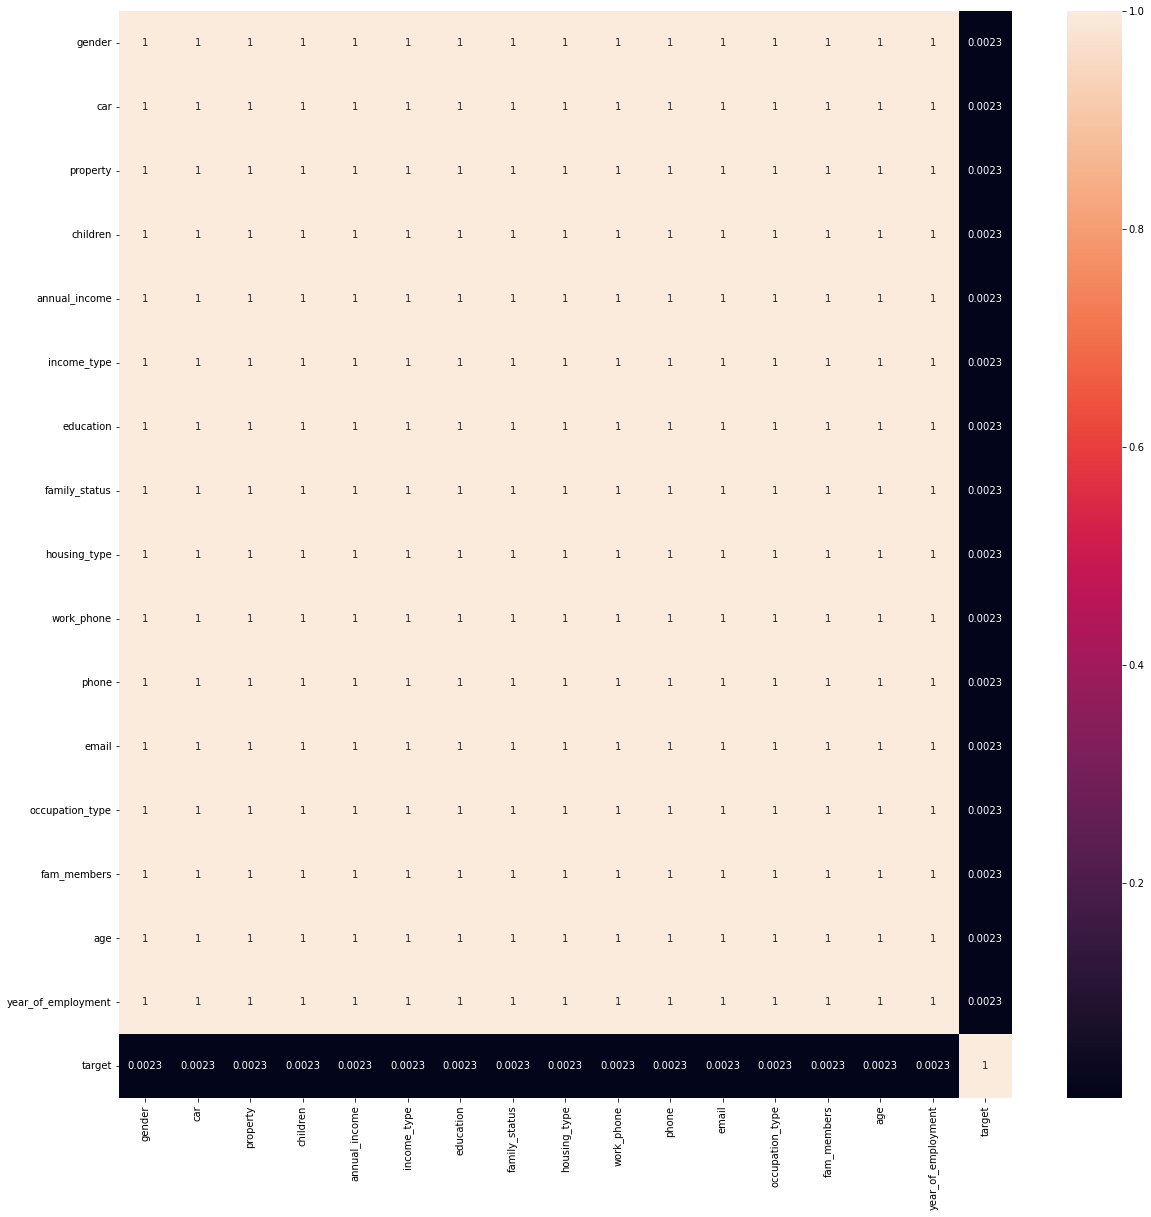

In [66]:
#5.2.2 Test on df_b set
df_b_train_processed = pd.concat([x_b_train_rs_over, y_b_train_over], axis=1) #combine processed features with their target

cm_b = df_b_train_processed.corr()

print(cm_b.target.sort_values().tail(10))

plt.figure(figsize=(20,20))
sns.heatmap(cm_b, xticklabels=df_b_train_processed.columns, yticklabels=df_b_train_processed.columns,annot=True)


24


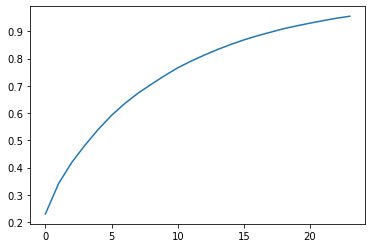

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,2.641906,0.276184,-0.838387,-0.200135,0.099043,0.613545,-0.421458,-0.062733,0.639090,0.392665,...,0.065852,0.044025,-0.110816,0.015758,-0.102284,0.012964,0.061606,-0.159975,0.012756,-0.102122
1,2.473278,0.446589,-0.667795,0.043013,0.268244,0.209256,0.173306,-0.369644,0.516635,-0.368060,...,-0.074468,0.202528,-0.224441,0.028998,-0.041895,0.056402,0.018317,0.003404,0.003859,-0.094778
2,-0.258434,-0.356557,-0.456800,0.402706,-1.174245,0.812244,0.070180,0.060542,-0.309117,-0.638506,...,0.097065,0.066373,-0.138140,0.084681,-0.072727,0.298920,0.024665,0.178606,-0.015522,0.121639
3,1.176948,0.135674,1.448382,0.623884,-0.086753,-0.107983,0.712059,-0.705213,0.501348,-0.051560,...,-0.248652,-0.037731,0.062341,-0.299329,-0.035943,0.216896,-0.408629,0.597918,0.190100,-0.068080
4,-0.395522,0.166722,1.274188,-0.048886,-0.440530,-0.182124,0.019375,0.496642,-1.030404,-0.098473,...,-0.180156,0.052861,-0.068589,-0.010738,-0.222017,0.333118,0.014834,-0.049454,-0.022761,0.054870


In [74]:
#5.3 Dimensionality reduction (Component-based): PCA
#PCA groups variables by their correaltions and each group is considered as a factor
#PCA creates a new group of factors that are uncorrelated
#in such a way that 1st PC explains the highest variance the followed by 2nd and so on...

#5.3.1 PCA on the df_a dataset
df_a_train_processed.shape

from sklearn.decomposition import PCA

pca=PCA(.95)#.get_params()
pca_a_train = pca.fit(x_a_train_rs_over, y_a_train_over)
print(pca_a_train.n_components_)

plt.plot(np.cumsum(pca_a_train.explained_variance_ratio_))
plt.show()

x_a_train_rs_over_pca = pd.DataFrame(pca_a_train.transform(x_a_train_rs_over))
x_a_train_rs_over_pca.head()

In [77]:
# apply PCA on the xtest set

pca_a_test=pca.fit(x_a_test_rs_over, y_a_test_over)
print(pca_a_test.n_components_)

x_a_test_rs_over_pca= pd.DataFrame(pca_a_test.transform(x_a_test_rs_over))
x_a_test_rs_over_pca.head()


24


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.732664,1.105195,1.241510,0.109427,0.195050,0.010242,-0.469046,-0.079891,0.366161,0.166072,...,0.243729,-0.060807,-0.057606,-0.037023,-0.049296,0.214538,-0.004419,-0.054674,-0.091472,-0.097449
1,1.350596,-0.091581,-0.401790,-0.029559,0.189051,-0.348103,-0.466165,0.041830,0.039649,0.488294,...,-0.049330,0.777273,-0.088600,-0.174954,-0.199107,-0.423515,0.037056,-0.133433,0.001008,0.009979
2,2.337575,0.715786,-0.927670,-0.564234,0.306161,-0.515236,-0.460715,-0.174078,0.235295,-0.304954,...,0.063748,0.036513,-0.072613,0.060270,0.006270,0.035709,0.031320,-0.010626,0.017171,-0.092547
3,1.359227,-0.066350,-0.321926,0.613783,0.594672,-0.035666,-0.463642,-0.075655,-0.043891,0.498265,...,-0.232299,0.741957,-0.011522,-0.248428,-0.222516,-0.485713,-0.151209,-0.018825,0.007791,0.130620
4,2.777460,-0.302675,-0.566006,0.556501,0.633396,0.610507,0.628494,0.441296,0.306485,-0.377481,...,1.081427,0.010731,0.018727,-0.101328,0.039568,-0.112847,-0.002634,-0.070530,0.045896,0.083761


In [78]:
# Apply PCA on df_b train set

pca_b_train = pca.fit(x_b_train_rs_over, y_b_train_over)
print(pca_b_train.n_components_)

x_b_train_rs_over_pca = pd.DataFrame(pca_b_train.transform(x_b_train_rs_over))
x_b_train_rs_over_pca.head()

1


,0
0,-1.28127
1,-1.28127
2,-1.28127
3,2.71873
4,-1.28127
